# <span style="background-color:yellow">  Zomato Delivery Data Analysis  

Author: Pratyakshkumar Parmar<br>
Time : October, 2023.




## **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**This dataset in not encoded using UTF-8.<br> So that, we need to use encoding with latin-1**

In [2]:
# Load the dataset

df = pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking columns in dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
# Getting information about data types, Columns, Missing Values and Memory Usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Getting basic description to know more about data.  Basically shows numerical columns.

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Missing Values

In [6]:
# Checking whether dataset has missing values

[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

## Getting another dataset Country Code

In [7]:
df_country_code = pd.read_excel('Country-Code.xlsx')
df_country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


## Merging another dataset

we have similar column name Country code which is common in both. We can Merge both dataset.

In [8]:
new_df = pd.merge(df,df_country_code,how='left',on='Country Code')
new_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
# Getting number of rows and columns
new_df.shape

(9551, 22)

In [10]:
# Getting Catagorical and Numerical columns separately

num_columns = new_df.describe().columns
cat_columns = new_df.describe(include='object').columns

print(num_columns)
print("\n"*2)
print(cat_columns)



Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')



Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')


In [11]:
new_df.groupby(['Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Rating color,Rating text,Rating Count
0,Dark Green,Excellent,301
1,Green,Very Good,1079
2,Orange,Average,3737
3,Red,Poor,186
4,White,Not rated,2148
5,Yellow,Good,2100


In [12]:
# Using groupby function:

rating_count = new_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [13]:
rating_count

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Getting Observations with Visualisation

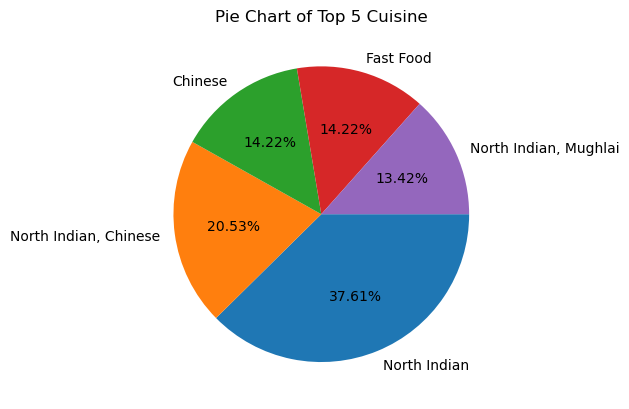

In [14]:
# Let's draw Pie Chart

plt.pie(labels = new_df.Cuisines.value_counts().index[:5],x=new_df.Cuisines.value_counts().values[:5],
        autopct='%1.2F%%', counterclock=False)
plt.title("Pie Chart of Top 5 Cuisine")
plt.show()


Text(0.5, 1.0, 'Rating Text Distribution by Pie Chart')

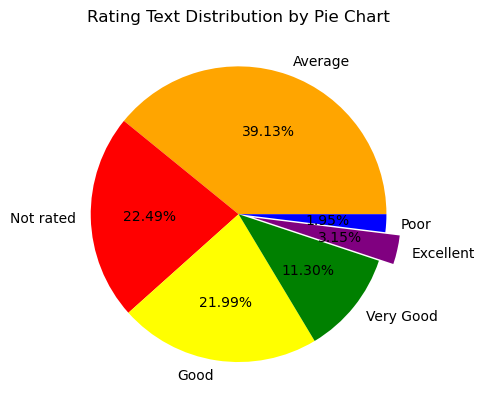

In [15]:
explode = (0, 0, 0, 0,0.10,0)

colors = ['Orange','red','yellow','green','Purple','blue']

rating_pie = plt.pie(x=new_df['Rating text'].value_counts().values,labels=new_df['Rating text'].value_counts().index,
                     autopct='%1.2f%%',counterclock=True,explode=explode,colors=colors)
plt.title("Rating Text Distribution by Pie Chart")

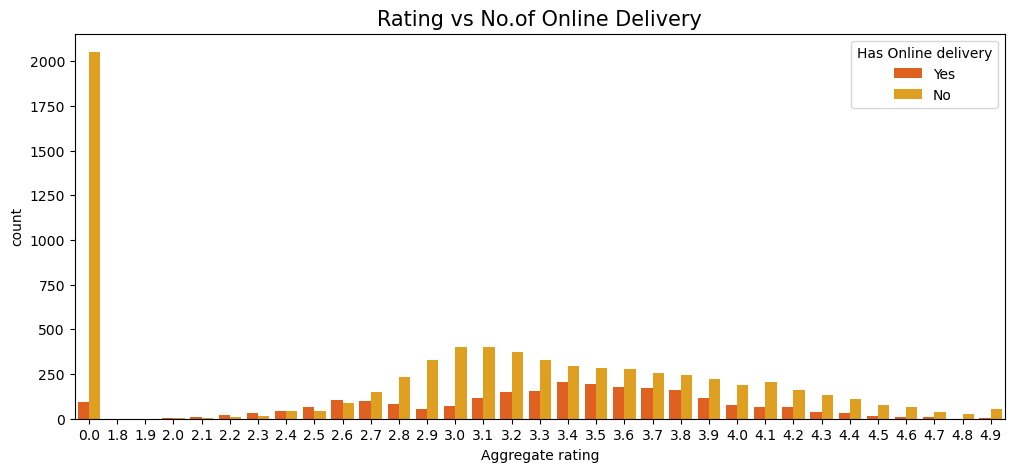

In [16]:
plt.figure(figsize=(12,5))

plt.title("Rating vs No.of Online Delivery",fontsize=15)

sns.countplot(x=new_df['Aggregate rating'],hue =new_df['Has Online delivery'],color =colors,hue_order=['Yes','No'], data=new_df,palette='autumn')

plt.show()

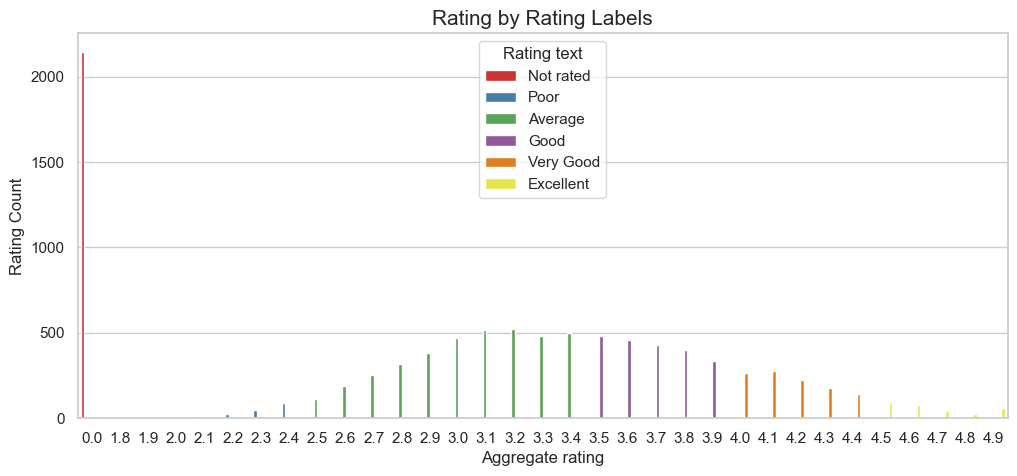

In [17]:
plt.figure(figsize=(12,5))

sns.set(style='whitegrid')

plt.title("Rating by Rating Labels",fontsize=15)

sns.barplot(x='Aggregate rating',y ='Rating Count', data=rating_count,hue='Rating text',palette='Set1')

plt.show()

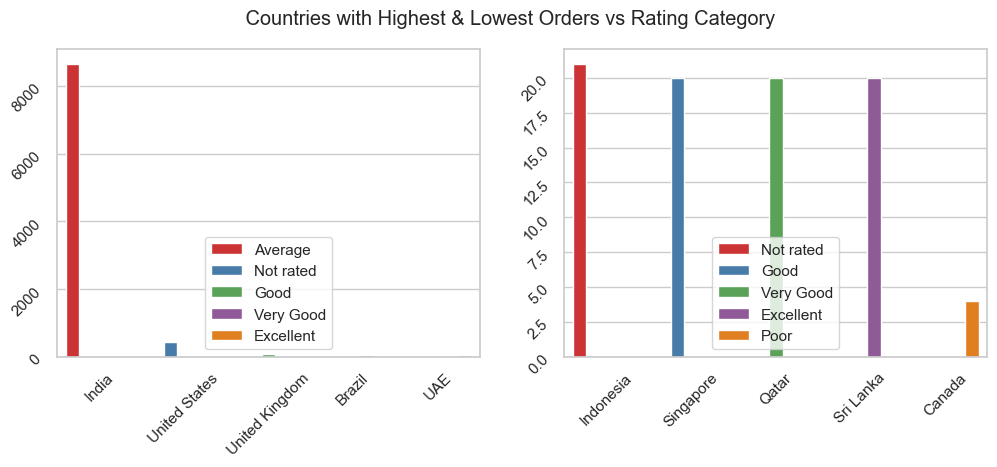

In [18]:
fig,axes = plt.subplots(1,2,figsize=(12,4),squeeze=False)

sns.set(style='whitegrid')

plt.suptitle(" Countries with Highest & Lowest Orders vs Rating Category")

sns.barplot(ax = axes[0,0],x=new_df.Country.value_counts().index[:5],y =new_df.Country.value_counts().values[:5],hue=new_df['Rating text'].value_counts().index[:5], data = new_df, palette="Set1")

sns.barplot(ax = axes[0,1],x=new_df.Country.value_counts().index[-5:],y =new_df.Country.value_counts().values[-5:],hue=new_df['Rating text'].value_counts().index[-5:], data = new_df, palette="Set1")

axes[0][0].tick_params(labelrotation=45);

axes[0][1].tick_params(labelrotation=45);

plt.show()

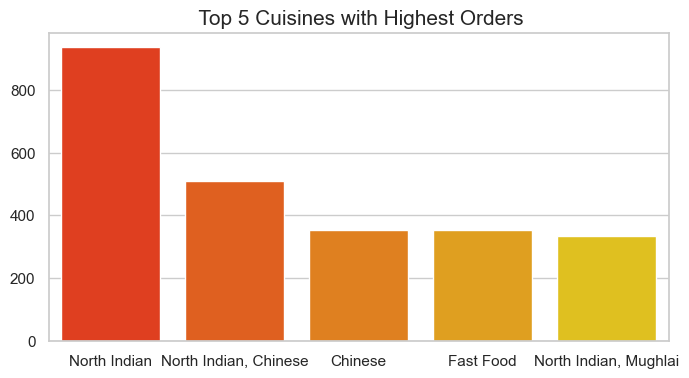

In [19]:
plt.figure(figsize=(8,4))

plt.title(" Top 5 Cuisines with Highest Orders",fontsize=15)

sns.set(style='whitegrid')

sns.barplot(x=new_df.Cuisines.value_counts().index[:5],y =new_df.Cuisines.value_counts().values[:5], data = new_df, palette="autumn")

plt.show()

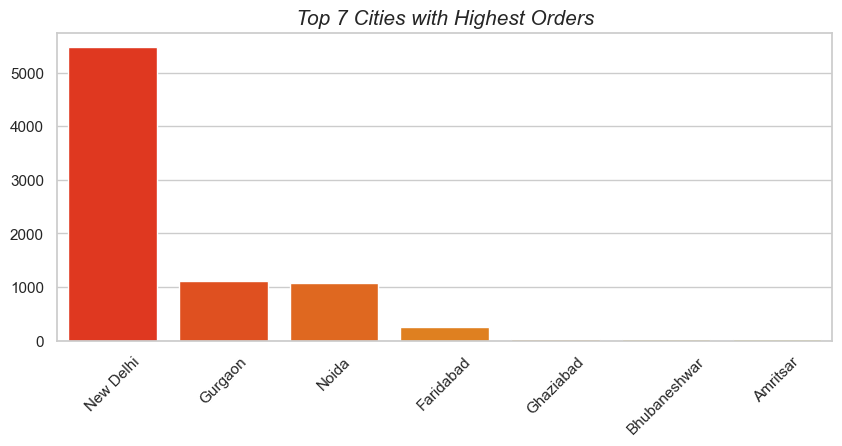

In [20]:
plt.figure(figsize=(10,4))

plt.title("Top 7 Cities with Highest Orders",fontsize=15,fontstyle='italic')

sns.set(style='whitegrid')

ax1 = sns.barplot(x=new_df.City.value_counts().index[:7],y =new_df.City.value_counts().values[:7], data = new_df, palette="autumn")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

plt.show(ax1)

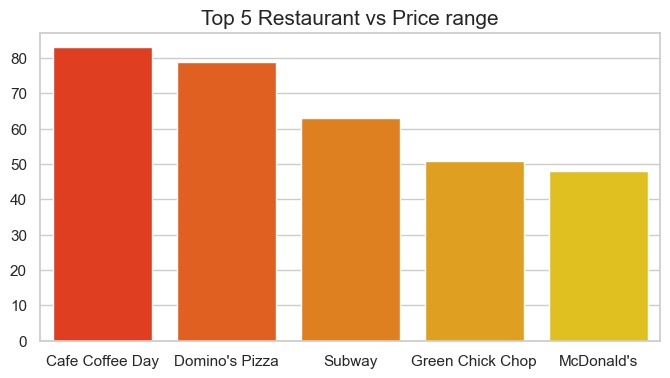

In [21]:
plt.figure(figsize=(8,4))

plt.title("Top 5 Restaurant vs Price range",fontsize=15)

sns.set(style='whitegrid')

sns.barplot(x=new_df['Restaurant Name'].value_counts().index[:5],y =new_df['Restaurant Name'].value_counts().values[:5], data = new_df, palette="autumn",)

plt.show()

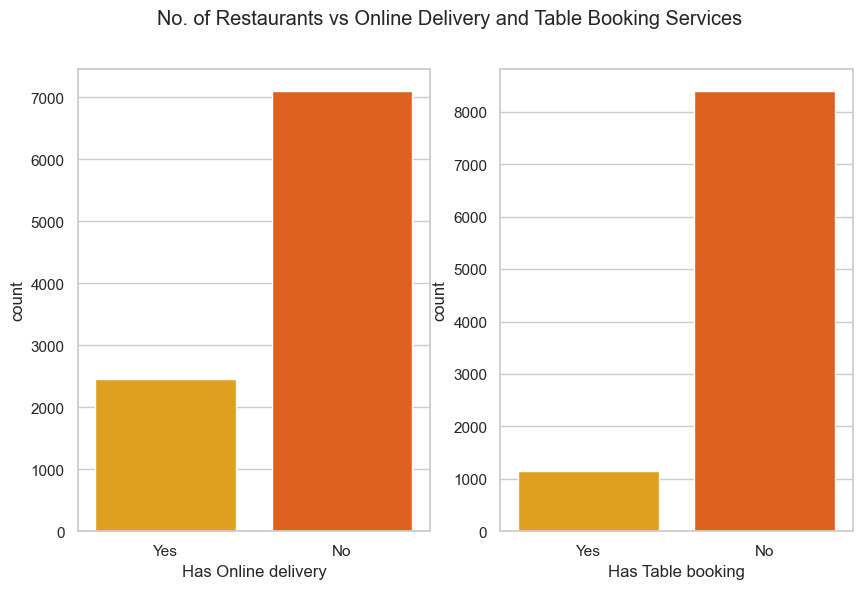

In [22]:
fig,axes = plt.subplots(1,2,figsize=(10,6),squeeze=False)

plt.suptitle("No. of Restaurants vs Online Delivery and Table Booking Services ")

sns.countplot(ax=axes[0,0],x=new_df['Has Online delivery'],order = ['Yes','No'],data=new_df,palette='autumn_r')

sns.countplot(ax=axes[0,1],x=new_df['Has Table booking'],order = ['Yes','No'],data=new_df,palette='autumn_r') 

plt.show()


<AxesSubplot:xlabel='Has Online delivery', ylabel='Price range'>

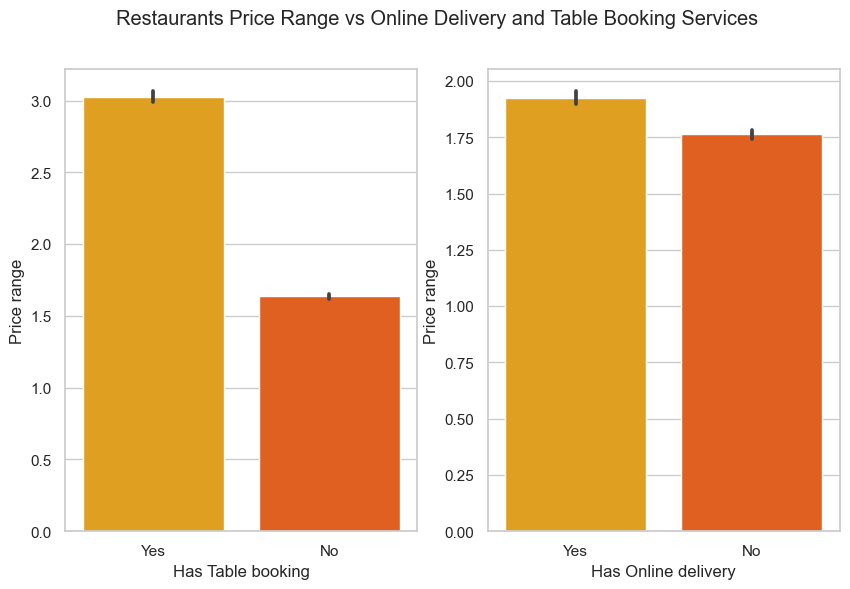

In [23]:
fig,axes = plt.subplots(1,2,figsize=(10,6),squeeze=False)

plt.suptitle("Restaurants Price Range vs Online Delivery and Table Booking Services ")

sns.barplot(ax=axes[0,0],y=new_df['Price range'],x=new_df['Has Table booking'],order = ['Yes','No'],data=new_df,palette='autumn_r')
sns.barplot(ax=axes[0,1],y=new_df['Price range'],x=new_df['Has Online delivery'],order = ['Yes','No'],data=new_df,palette='autumn_r')

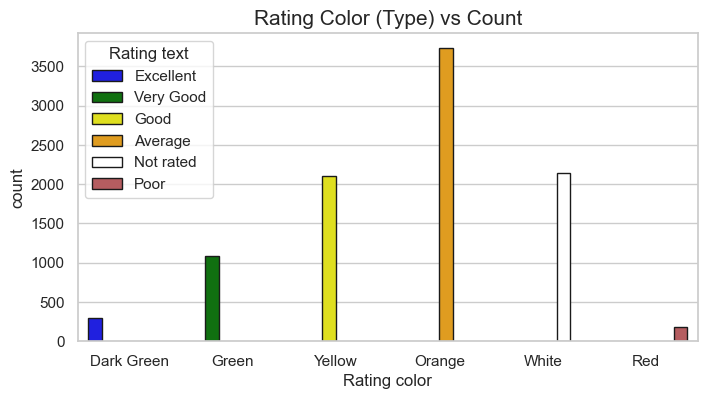

In [24]:
plt.figure(figsize=(8,4))

plt.title("Rating Color (Type) vs Count",fontsize=15)

sns.set(style='whitegrid')

sns.countplot(x=new_df['Rating color'],hue=new_df['Rating text'] ,data=new_df,palette=['blue','green','yellow','orange','white','r'],edgecolor='k')

plt.show()

## OBSERVATIONS:

<span style="background-color:yellow">    
1) With Highest Numbers of Orders, India is occupying around 94.39 % of Worle-wide Ratio.<br><br> 

<span style="background-color:yellow">
2) Top 5 Highest Ordered Cuisines: <br><br>
North Indian    =                  936 <br>
North Indian, Chinese   =          511 <br>
Chinese     =                      354 <br>
Fast Food    =                     354 <br>
North Indian, Mughlai    =         334 <br>
<br><br>     
3) Top 7 Cities with Highest Orders:<br> <br>
New Delhi =       5473 <br> 
Gurgaon  =       1118 <br> 
Noida  =         1080 <br> 
Faridabad   =     251 <br> 
Ghaziabad  =       25 <br><br>
<span style="background-color:yellow">
4) There are ~7000 Restaurants don't have Online delivery.<br>
Around ~2400 have Online Delivery<br> <br>
<span style="background-color:yellow">
5) Around ~ 8000 Restaurants don't have Table booking.<br>
While,~100 have Table booking.<br><br>
6) Price range is nearly Double which provides Table Booking(~3) compared to Non Booking(~1.5).<br><br>
7) Ratings:<br>
Excellent: 4.5 to 4.9 <br>
Very Good:4 to 3.4 <br>
Good: 3.5 to 3.9 <br>
Average:2.5 to 3.4 <br>
Poor: 2.0 to 2.4<br>


***Some More findings...***

### Q: Find out the countries with 0 ratings.

In [25]:
dff = new_df[new_df['Rating text']=='Not rated']

In [26]:
dff['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

***A: Maximum O ratings are from india and Least from United Kingdom.***

### Q: Name currency used by relevant countries.

In [27]:
currency_vs_country = new_df.groupby(['Country','Currency']).size().reset_index()
currency_vs_country

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### Q: Which Countries have Online delivery services.

In [28]:
new_df[new_df['Has Online delivery']=='Yes'].groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

In [29]:
new_df[new_df['Has Online delivery']=='No'].groupby('Country').size()

Country
Australia           24
Brazil              60
Canada               4
India             6229
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 32
United Kingdom      80
United States      434
dtype: int64

### Q: Which Restaurants have Excellent and Which have poor ratings.

In [30]:
rest_exlnt_rate = new_df[new_df['Rating text']=='Excellent'].groupby('Restaurant Name').size().reset_index()

In [31]:
print(f" Restaurants having Excellent Ratings are:\n\n {rest_exlnt_rate['Restaurant Name'].value_counts().head().index}")

 Restaurants having Excellent Ratings are:

 Index([''Ohana', 'Pa Pa Ya', 'Pom Pom's Teahouse and Sandwicheria',
       'Pizza ÛÁl Forno', 'Pizza Hut'],
      dtype='object')


In [32]:
rest_poor_rate = new_df[new_df['Rating text']=='Poor'].groupby('Restaurant Name').size().reset_index()

In [33]:
print(f" Top 5 Restaurants having Poor Ratings are:\n\n {rest_poor_rate['Restaurant Name'].value_counts().head().index}")

 Top 5 Restaurants having Poor Ratings are:

 Index(['34, Chowringhee Lane', 'Pandit Ji Ki Apni Rasoi', 'Sagar Ratna',
       'Raj Restaurant', 'RPM - Zanzi Bar'],
      dtype='object')


### Q: Which Countries have Excellent and Which have poor ratings.

In [34]:
ex_rate = new_df[new_df['Rating text']=='Excellent'].groupby('Country').size().reset_index()

In [35]:
print(f" Countries having Excellent Ratings are:\n\n {ex_rate.Country.value_counts().index}")

 Countries having Excellent Ratings are:

 Index(['Australia', 'Brazil', 'India', 'Indonesia', 'New Zealand',
       'Phillipines', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey', 'UAE',
       'United Kingdom', 'United States'],
      dtype='object')


In [36]:
poor_rate = new_df[new_df['Rating text']=='Poor'].groupby('Country').size().reset_index()

In [37]:
print(f" Countries having Poor Ratings are:\n\n {poor_rate.Country.value_counts().index}")

 Countries having Poor Ratings are:

 Index(['Australia', 'India', 'New Zealand', 'Sri Lanka', 'UAE',
       'United States'],
      dtype='object')


### Q: Top 5 Cuising by votes

In [38]:
a = new_df.groupby(['Votes','Cuisines']).size().reset_index().value_counts().head(5)
print(a)

Votes  Cuisines                          0
0      Afghani                           3    1
158    Healthy Food                      1    1
155    Indonesian                        1    1
       Fast Food, Street Food            1    1
       Fast Food, North Indian, Chinese  1    1
dtype: int64


### Q: Cuisine by Maximum Votes

In [39]:
max_votes = new_df['Votes'].max()
max_votes

10934

In [40]:
max_vote_cuisine = new_df[new_df['Votes']==10934]
print(F"Cuisines is: \n {max_vote_cuisine.Cuisines}")

Cuisines is: 
 728    Italian, American, Pizza
Name: Cuisines, dtype: object


***A: Italian, American, Pizza Cuisines with 10934 votes***

# Thank you 

### Git hub Link for this code is: